<h2>RDD in Spark</h2>

RDD (Resilient Distributed Dataset) is a fundamental building block of PySpark which is fault-tolerant, immutable distributed collections of objects. Immutable meaning once you create an RDD you cannot change it. Each record in RDD is divided into logical partitions, which can be computed on different nodes of the cluster. n other words, RDDs are a collection of objects similar to list in Python, with the difference being RDD is computed on several processes scattered across multiple physical servers also called nodes in a cluster while a Python collection lives and process in just one process.

<h3>RDD Benefits</h3>

<h4>In-Memory Processing</h4>
PySpark loads the data from disk and process in memory and keeps the data in memory,

<h4>Immutability</h4>
PySpark RDD’s are immutable in nature meaning, once RDDs are created you cannot modify. If we apply transformations (will discuss later) on RDD, PySpark creates a new RDD and maintains the RDD Lineage.

<h4>Fault Tolerance</h4>
PySpark operates on fault-tolerant data stores on HDFS, S3 e.t.c hence any RDD operation fails, it automatically reloads the data from other partitions. Also, When PySpark applications running on a cluster, PySpark task failures are automatically recovered for a certain number of times (as per the configuration) and finish the application seamlessly.

<h4>Lazy Evaluation</h4>
Spark supports lazy evaluation. RDD keeps the data in different partitions and is not loaded until it is necessary or asked by the program. Spark can combine multiple operations to be executed together on the same RDD.

Once you create an RDD, it splits the input data (datalist) into different partion as shown in the following figure:
<br>
<br>

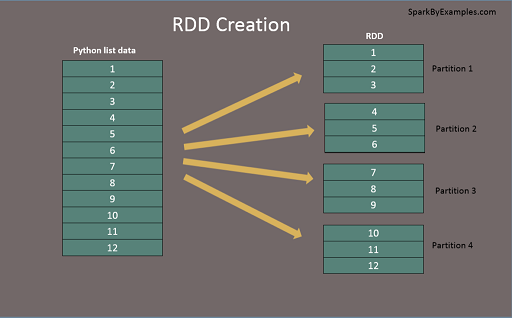




<h2>SparkSession</h2>
SparkSession was introduced in version 2.0 (before that it was SparkContext), It is an entry point to underlying PySpark functionality in order to programmatically create PySpark RDD, DataFrame. It is a combinaiton of different classes we used to run Spark programs.

<h3>Creating a SparkSession</h3>

In order to create SparkSession programmatically (in .py file) in PySpark, you need to use the builder pattern method builder() as explained below. getOrCreate() method returns an already existing SparkSession; if not exists, it creates a new SparkSession.


In [2]:
import pyspark
from pyspark.sql import SparkSession
sparksession = SparkSession.builder.master("local[4]") \
                    .appName('SparkByExamples.com') \
                    .getOrCreate()
print(sparksession)

Here, master(): defines the main machine of a cluster. The master works as entry point of a spark cluster. <br>
builder(): This API helps to create a spark session on the cluster <br>
local[x]: use this when running in Standalone mode. x represents the number of core going to be used by Spark. Always need to be greater than 0. <br>
appName() – Used to set your application name. <br>
getOrCreate() – This returns a SparkSession object if already exists, and creates a new one if not exist.


<h3>Creating Another Session</h3>
You can also create a new SparkSession using newSession() method in the same application. This uses the same app name, master as the existing session. Underlying SparkContext will be the same for both sessions as you can have only one context per PySpark application.


In [3]:
sparksession2 = SparkSession.newSession
print(sparksession2)

<function SparkSession.newSession at 0x7fce1b2c1990>


<br>
<h2>SparkContext</h2>
SparkContext is an entry point to the PySpark functionality that is used to communicate with the cluster and to create an RDD, accumulator, and broadcast variables among the cluster machines. It was previously used before SparkSession. Still, its functionality are adapted and used by SparkSession. 

For your knowledge, in this section, I am going to add some code on how to work with SparkContext. It might be a scenario you are going to use older Spark version for some of your works.

Using with <strong>SparkSession</strong>


In [4]:
print (sparksession.sparkContext)
print(sparksession.sparkContext.appName)

<SparkContext master=local[4] appName=SparkByExamples.com>
SparkByExamples.com



<h3>Create SparkContext</h3>


In [5]:
# This code is used prior to SparkSession. It is recommended to use the SparkSession and SparkContext through it.
from pyspark import SparkConf, SparkContext
conf = SparkConf()
conf.setMaster("local").setAppName("Spark Example App")
sc = SparkContext.getOrCreate(conf)
print(sc.appName)

SparkByExamples.com


<h3>Collect()</h3>
collect is an RDD action function that is used to retrieve all the elements of the dataset. Usually we don't use collect on the full dataset because it will be too big. collect is used on small data size. Normally, collect is used on the filtered data or a part of data to see the loaded rdd value.



<h3>Create RDD</h3>

Using SparkContext of SparkSession in PySpark, RDD can be easily created.

In [6]:
rdd = sparksession.sparkContext.range(1, 10)
print(rdd.collect())


[1, 2, 3, 4, 5, 6, 7, 8, 9]



<strong>SparkContext</strong> has some built-in APIs which help use to load the data in RDD. They are parallelize(), textFile() and wholeTextFiles(). CSV files are usually loaded to PySpark dataFrames. These APIs perform automatically partitioning the given data and load them in different partitions of RDD.

1. parallelize()


In [7]:
rdd = sparksession.sparkContext.parallelize(range(1,10))
print(rdd.collect())
print(str(rdd.getNumPartitions()))

[1, 2, 3, 4, 5, 6, 7, 8, 9]
4


2. textFile()

In [3]:
rdd = sparksession.sparkContext.textFile("data.txt")
print(rdd.collect())
print(str(rdd.getNumPartitions()))

['PySpark is a Spark library written in Python to run Python applications using Apache Spark capabilities, using PySpark we can run applications parallelly on the distributed cluster (multiple nodes). ', 'In other words, PySpark is a Python API for Apache Spark. Apache Spark is an analytical processing engine for large scale powerful distributed data processing and machine learning applications.', 'Spark basically written in Scala and later on due to its industry adaptation it’s API PySpark released for Python using Py4J. Py4J is a Java library that is integrated within PySpark and allows python to dynamically interface with JVM objects, hence to run PySpark you also need Java to be installed along with Python, and Apache Spark.']
2


3. wholeTestFiles()

In [ ]:
rdd = sparksession.sparkContext.wholeTextFiles("data.txt")
print(rdd.collect())
print(str(rdd.getNumPartitions()))

NameError: name 'sparksession' is not defined


<h3>Exercise 1</h3>

Can you see any difference between the textFile and wholeTextFiles() rdd loading process? What are they? Can you load two files together with wholeTextFiles()?

Response: They both retrieve the content of the text file, but the difference being that .textFile() separates the output as per the newlines(RETURN/ENTER) so that every line before and after a newline is stored as an element in the dataset, while .wholeTextFiles() stores the file paths and saves the newlines as commands ("\n", "\r") 
You can load 2 files together with .wholeTextFiles()

<h3>Set number of partitions</h3>
Although its optional, but we can define the number of partitions in each rdd at time of creation.


In [19]:
rdd = sparksession.sparkContext.parallelize(range(1,10), 5) # here 5 is number of partitions set and created by PySpark when creating rdd
print(rdd.collect())
print(str(rdd.getNumPartitions()))

[1, 2, 3, 4, 5, 6, 7, 8, 9]
5


<h3>Repartition if required</h3>
The already partitioned rdd can be repartitioned too. 


In [21]:
rdd = rdd.repartition(4)
print(str(rdd.getNumPartitions()))

4
12



<h3>Reading from a csv file</h3>
Reading from a csv file mainly load the data in a PySpark Dataframe. It is almost look line Python Pandas dataframe, but mostly different than it. And the difference exists in different directions. We will later discuss on this.

In this example, we are going to load the testcsv.csv data in pyspark memory for later execution.


In [23]:
rdd = sparksession.read.csv("testcsv.csv")
type(rdd)
rdd.show(5) # To check only the first 5 rows and their data. This section is done to test the data load in rdd.

+---+-------+--------+-------------------+-----+----------+
|_c0|    _c1|     _c2|                _c3|  _c4|       _c5|
+---+-------+--------+-------------------+-----+----------+
| id|zipcode|    type|               city|state|population|
|  1|    704|STANDARD|               null|   PR|     30100|
|  2|    704|    null|PASEO COSTA DEL SUR|   PR|      null|
|  3|    709|    null|       BDA SAN LUIS|   PR|      3700|
|  4|  76166|  UNIQUE|  CINGULAR WIRELESS|   TX|     84000|
+---+-------+--------+-------------------+-----+----------+
only showing top 5 rows



<br>
<h3>Exercise 2</h3>

Create a new SparK Session. Use your name as the spark session name. Use 1/2 of the CPU cores as your spark app usuable core. You can use multiprocessing.cpu_count() to get the number of cores in your machine.

Once the session created, print all the information you put in the Spark app (i.e. AppName, Core Numbers)

In [11]:
import pyspark
import multiprocessing
from pyspark.sql import SparkSession

count = multiprocessing.cpu_count()
half = int(count / 2)
spark = SparkSession.builder.master("local[" + str(half) + "]").appName("tuan").getOrCreate()

print(spark.sparkContext.appName)
print(half)
spark

tuan
2


<h3>Exercise 3</h3>
Generate a list of random numbers. The list will keep square value for each of the randomly generated number. The list size wouldn't be less than 15. Put all of them in RDD with partition numbers equal to 1/4 of your cpu core numbers. 

In [9]:
from numpy.random import seed, randint

seed()
sqr = lambda x: x ** 2
ranval = list(sqr(randint(0, 100, 15)))
rdd = spark.sparkContext.parallelize(ranval, half / 2)
print(rdd.collect())

[9604, 6084, 1225, 3844, 841, 4489, 5041, 121, 9801, 9216, 2704, 121, 8281, 4489, 1849]


<h3>Exercise 4</h3>
Create another rdd which will read data from the given text.txt file. Divide the RDD into 1/4th of your CPU core numbers.

In [10]:
frdd = spark.sparkContext.textFile("test.txt", int(half / 2))
print(frdd.collect())
print(frdd.getNumPartitions())

['Project Gutenberg’s', 'Alice’s Adventures in Wonderland', 'by Lewis Carroll', 'This eBook is for the use', 'of anyone anywhere', 'at no cost and with', 'Alice’s Adventures in Wonderland', 'by Lewis Carroll', 'This eBook is for the use', 'of anyone anywhere', 'at no cost and with', 'This eBook is for the use', 'of anyone anywhere', 'at no cost and with', 'Project Gutenberg’s', 'Alice’s Adventures in Wonderland', 'by Lewis Carroll', 'This eBook is for the use', 'of anyone anywhere', 'at no cost and with', 'Alice’s Adventures in Wonderland', 'by Lewis Carroll', 'This eBook is for the use', 'of anyone anywhere', 'at no cost and with', 'This eBook is for the use', 'of anyone anywhere', 'at no cost and with', 'Project Gutenberg’s', 'Alice’s Adventures in Wonderland', 'by Lewis Carroll', 'This eBook is for the use', 'of anyone anywhere', 'at no cost and with', 'Alice’s Adventures in Wonderland', 'by Lewis Carroll', 'This eBook is for the use', 'of anyone anywhere', 'at no cost and with', 'T